In [1]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd #dataframes 
import numpy as np #linear algebra
import seaborn as sns #visualization
sns.set(color_codes=True)

import scipy.stats as stats #statistical resources

import matplotlib.pyplot as plt #visualisation 
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter



### Importing csv file containing Planning Permissions for New Houses and Apartments - Ireland (1975 to 2022)

In [2]:
#Import dataset
data = pd.read_csv("Planning_Permissions_Granted_for_New_Houses_and_Apartments.csv")

In [3]:
#Display heading to have a first look on the data, show 10 first rows
data.head(10)

,Unnamed: 0,Planning Permissions Granted,Units for which Permission Granted,Total Floor Area for which Permission Granted,Average Floor Area per Unit
0,"Source: Central Statistics Office, Ireland.",NaN,NaN,NaN,NaN
1,1975,NaN,"23,028",NaN,NaN
2,1976,NaN,"24,616",NaN,NaN
3,1977,"12,390","29,402","3,103",105.5
4,1978,"13,870","28,408","3,167",111.5
5,1979,"15,897","33,474","3,855",115.2
6,1980,"14,220","30,898","3,676",119.0
7,1981,"14,096","34,041","4,005",117.7
8,1982,"13,082","31,641","3,690",116.6
9,1983,"10,895","31,227","3,522",112.8


In [4]:
#print summarised information from dataframe 
data.info()
print(data.shape)
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     49 non-null     object 
 1   Planning Permissions Granted                   45 non-null     object 
 2   Units for which Permission Granted             48 non-null     object 
 3   Total Floor Area for which Permission Granted  45 non-null     object 
 4   Average Floor Area per Unit                    45 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.0+ KB
(49, 5)
Unnamed: 0                                       0
Planning Permissions Granted                     4
Units for which Permission Granted               1
Total Floor Area for which Permission Granted    4
Average Floor Area per Unit                      4
dtype: int64


The info() method from pandas prints basic information of the dataframe, alied with the shape method to understand the dimensionality of the same. 

For the Planning Permissions dataframe a total of 49 observations divided in 5 columns, where the datatype for the first four are classified as objects and the last being a numeric value. Looking closer to the heading of the data, the values are expected to be all in numeric form, which requires data preparation techniques to be applied and redefine the datatypes using function from numpy library.

the info() also brings the non-null values which helps to identify the missing data, confirmed by the isnull().sum() method that this dataframe contains missing data in four columns.

In [5]:
#see the last 5 rows of the dataframe
data.tail()

,Unnamed: 0,Planning Permissions Granted,Units for which Permission Granted,Total Floor Area for which Permission Granted,Average Floor Area per Unit
44,2018,"6,103","19,964","3,166",159.0
45,2019,"6,265","19,563","3,090",158.0
46,2020,"5,844","17,709","2,732",154.0
47,2021,"7,971","16,719","2,915",174.0
48,2022,"7,401","17,454","2,915",167.0


In [6]:
#replace commas from dataset to convert values from object to integers
data.replace(',','', regex=True, inplace=True)


In [7]:
# rename first column and reset index so the years are the new index
data = data.rename(columns={'Unnamed: 0':'Year'})
                                             

In [8]:
data.head()

,Year,Planning Permissions Granted,Units for which Permission Granted,Total Floor Area for which Permission Granted,Average Floor Area per Unit
0,Source: Central Statistics Office Ireland.,NaN,NaN,NaN,NaN
1,1975,NaN,23028,NaN,NaN
2,1976,NaN,24616,NaN,NaN
3,1977,12390,29402,3103,105.5
4,1978,13870,28408,3167,111.5


In [9]:
# specify which columns to convert to numeric dtype
cols_to_convert = ["Planning Permissions Granted", "Units for which Permission Granted", "Total Floor Area for which Permission Granted"]

# use the to_numeric method to convert the columns to numeric type
data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric)

# print the updated DataFrame
print(data)


                                          Year  Planning Permissions Granted  \
0   Source: Central Statistics Office Ireland.                           NaN   
1                                         1975                           NaN   
2                                         1976                           NaN   
3                                         1977                       12390.0   
4                                         1978                       13870.0   
5                                         1979                       15897.0   
6                                         1980                       14220.0   
7                                         1981                       14096.0   
8                                         1982                       13082.0   
9                                         1983                       10895.0   
10                                        1984                        9126.0   
11                                      

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           49 non-null     object 
 1   Planning Permissions Granted                   45 non-null     float64
 2   Units for which Permission Granted             48 non-null     float64
 3   Total Floor Area for which Permission Granted  45 non-null     float64
 4   Average Floor Area per Unit                    45 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [11]:
#data.dropna(["VALUE"]=="Nan", inplace=True)

In [13]:
#drop Nan Values to clean data
data = data.dropna(subset=data.columns[:3])

# Reset the index
data.set_index("Year", inplace=True)
# Display the updated DataFrame
display(data.head())

,Planning Permissions Granted,Units for which Permission Granted,Total Floor Area for which Permission Granted,Average Floor Area per Unit
Year,,,,
1977,12390.0,29402.0,3103.0,105.5
1978,13870.0,28408.0,3167.0,111.5
1979,15897.0,33474.0,3855.0,115.2
1980,14220.0,30898.0,3676.0,119.0
1981,14096.0,34041.0,4005.0,117.7


In [36]:
data.describe()

,Planning Permissions Granted,Units for which Permission Granted,Total Floor Area for which Permission Granted,Average Floor Area per Unit
count,45.000000,45.000000,45.000000,45.000000
mean,10934.000000,28359.600000,3921.777778,143.180000
std,5826.388016,18910.501162,2714.805860,28.940822
min,3103.000000,5389.000000,1110.000000,73.800000
25%,6396.000000,16719.000000,2258.000000,119.000000
50%,9126.000000,19964.000000,2981.000000,139.500000
75%,14096.000000,33474.000000,4127.000000,167.000000
max,25751.000000,75650.000000,11278.000000,206.000000


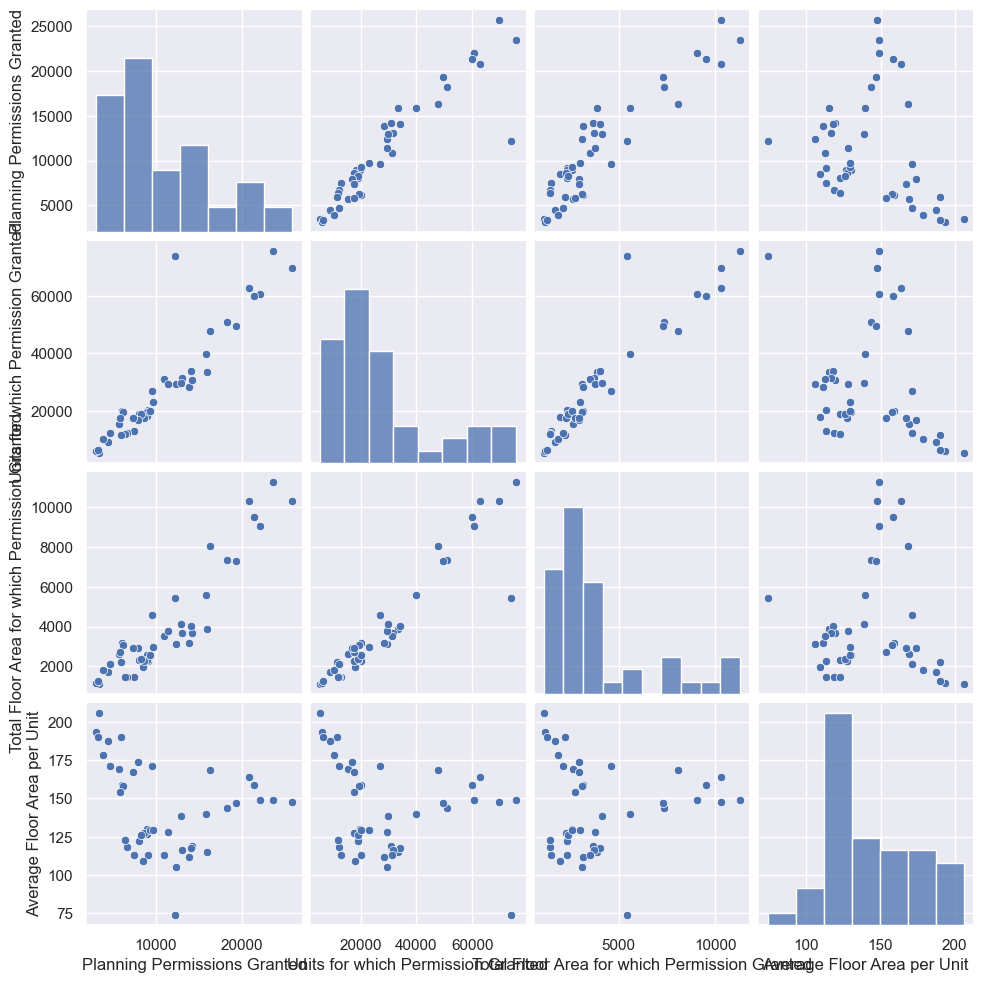

In [14]:
sns.pairplot(data)

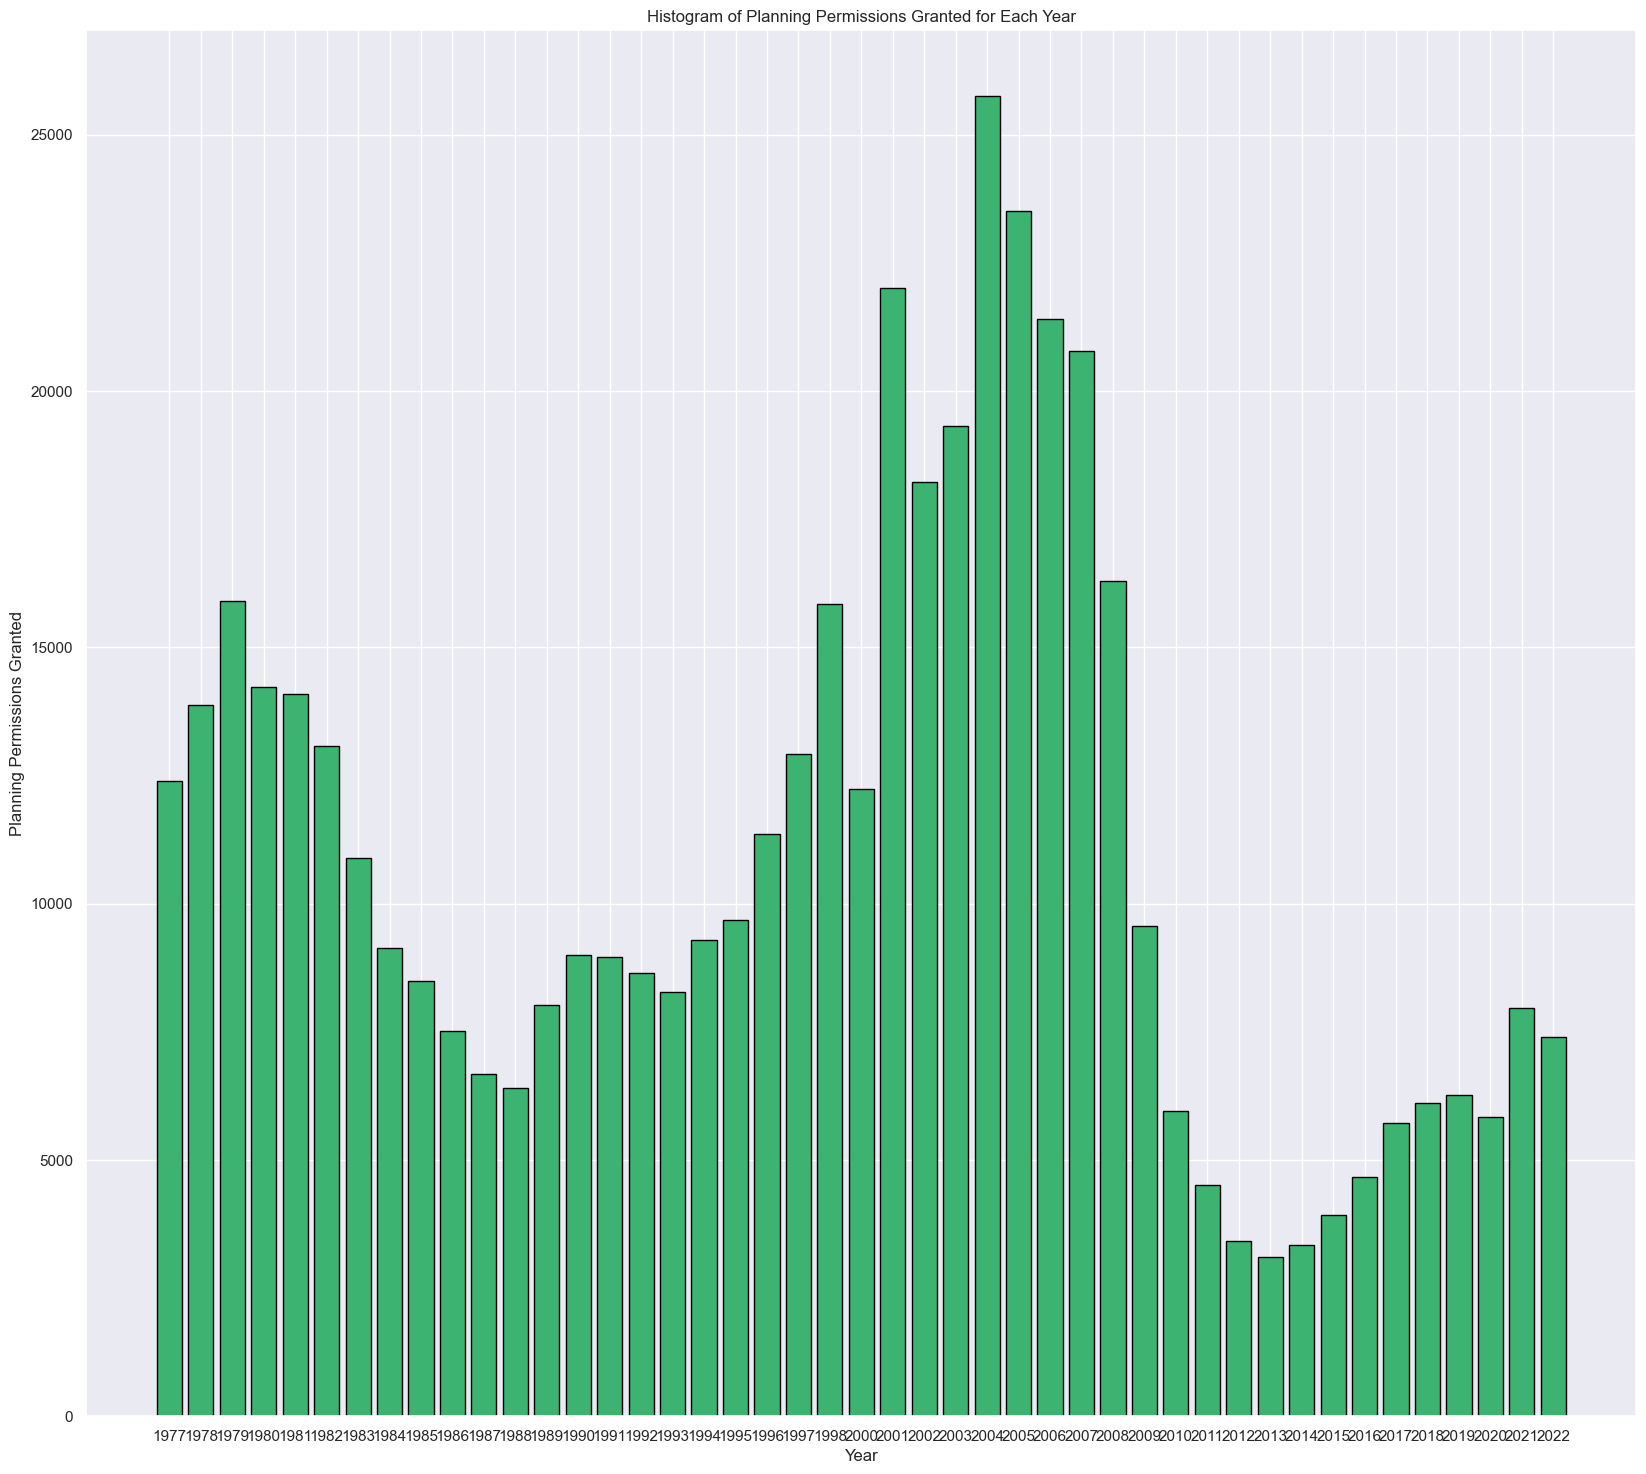

In [44]:
#create a histogram with the Planning Permissions Granted over the years using Matplotlib

# Adjust the figure size
plt.figure(figsize=(20,18))


# Create a histogram for each year
plt.bar(data.index, data['Planning Permissions Granted'], color='mediumseagreen', edgecolor="black")

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Planning Permissions Granted')
plt.title('Histogram of Planning Permissions Granted for Each Year')


# Display the plot
plt.show()

For creating the plot we use plt.bar() to create a bar plot, where each bar represents the planning permissions granted for a specific year. The x-values are taken from the index of the DataFrame using df.index, and the y-values are taken from the 'Planning Permissions Granted' column using df['Planning Permissions Granted'].
The histogram plot should display the planning permissions granted for each year using the correct DataFrame structure.

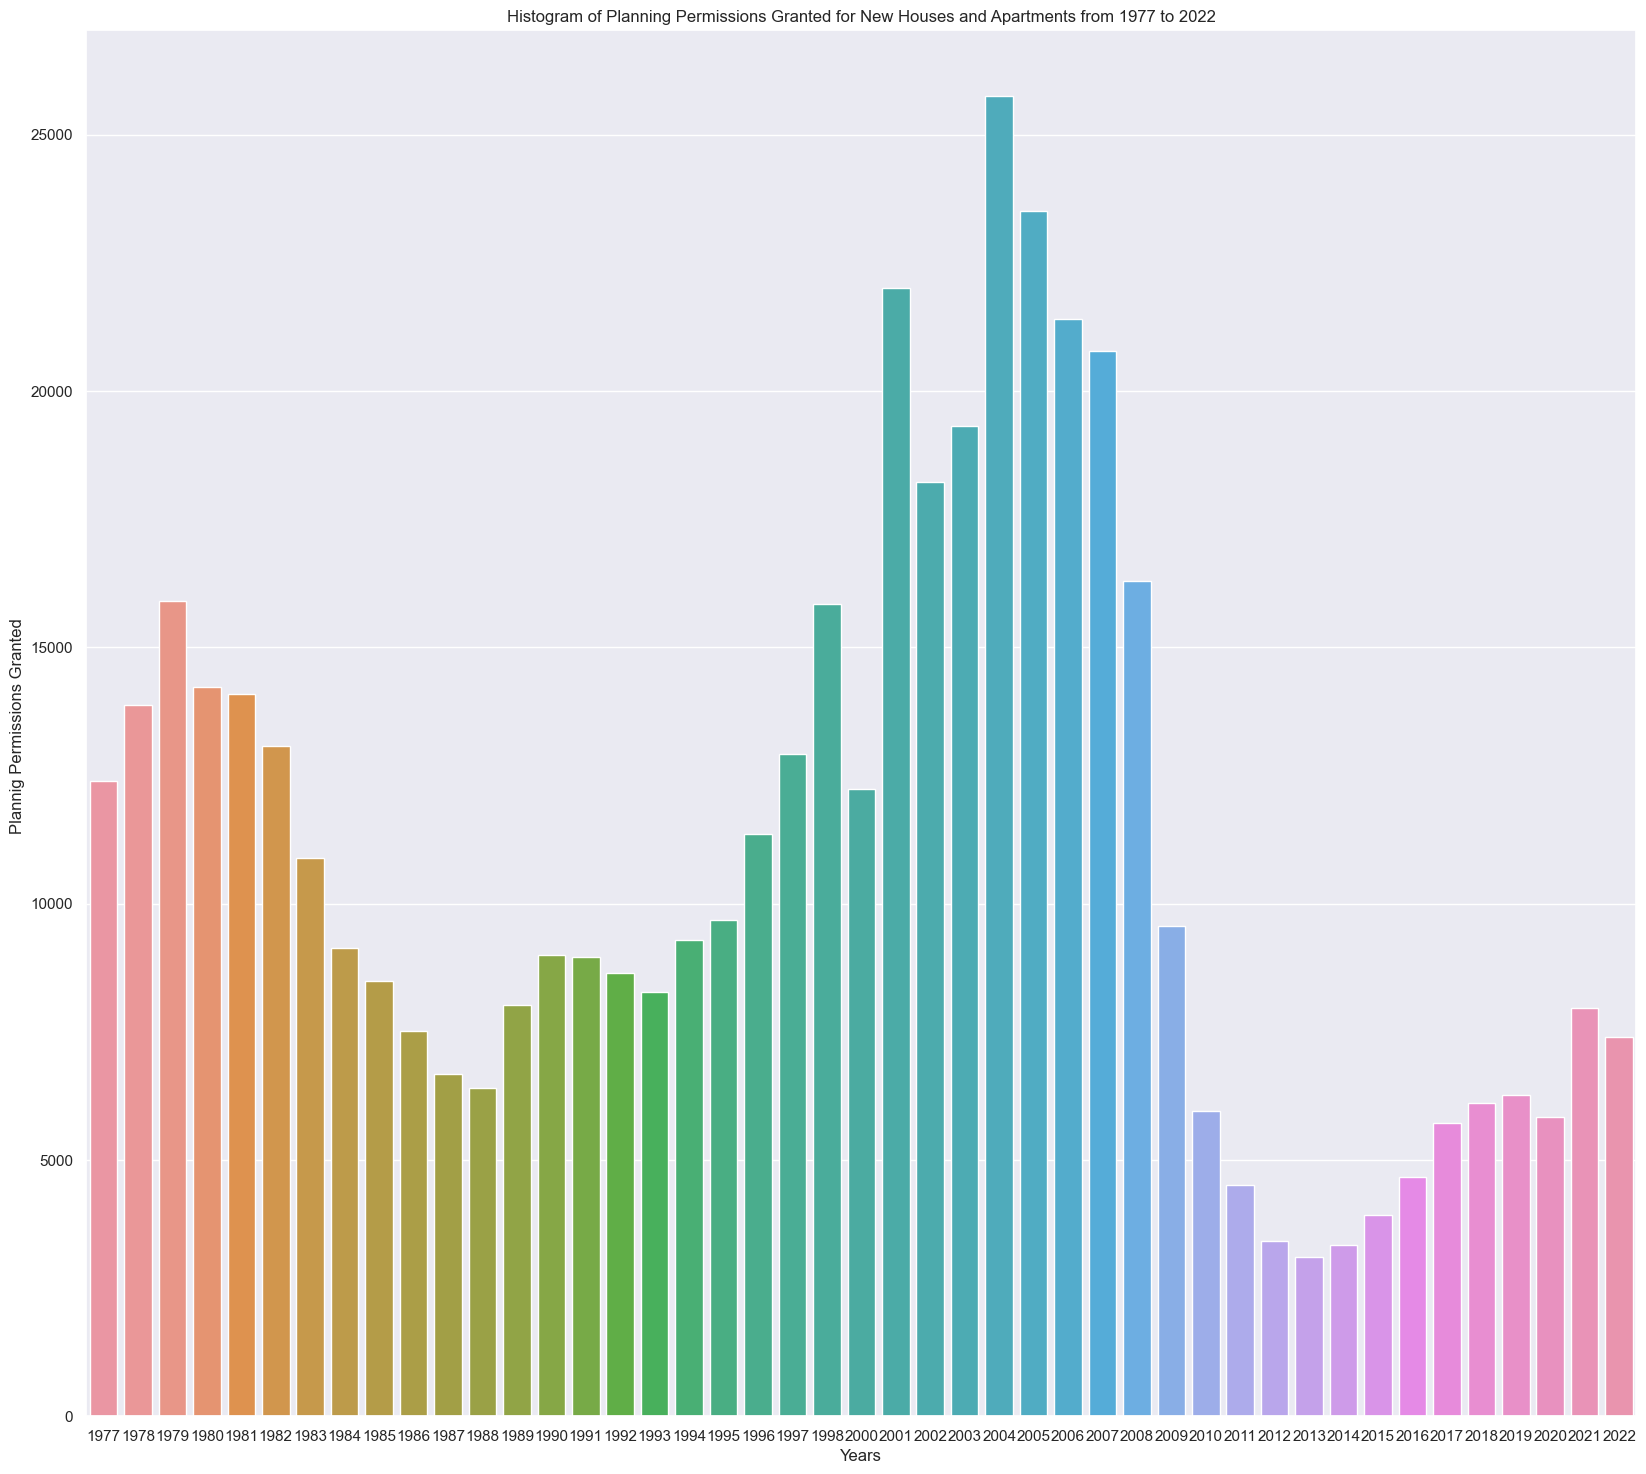

In [71]:
#create the same plot but using seaborn library to compare the graphics 


# Adjust the figure size
plt.figure(figsize=(20,18))


# Set seaborn style
sns.set(style='darkgrid')

# Create a histogram using seaborn
sns.barplot(data=data, x=data.index, y='Planning Permissions Granted')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Plannig Permissions Granted ')
plt.title('Histogram of Planning Permissions Granted for New Houses and Apartments from 1977 to 2022')

# Display the plot
plt.show()




